In [1]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
def sinc_interp(n, xn, L):
    
    """
    Parameters
    ----------
    n: int
        Index for interpolation point
        
    xn: array-like
        Interpolation points
        
    L: float, int
        Upsampling factor
    """
    return sum([xn[k] * np.sinc((n - k*L)/L) for k in range(len(xn))])


In [28]:
def plt_layout(name=None):
    
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Amplitude', fontsize=14)
    plt.grid()
    plt.legend()
    
    if name:
        plt.savefig(f"{name}.png")

In [21]:
pi = np.pi
cos = np.cos

xn = lambda n: cos( (pi*n)/4 ) + cos( (3*pi*n)/4 )

# Down sampling by a factor of 4

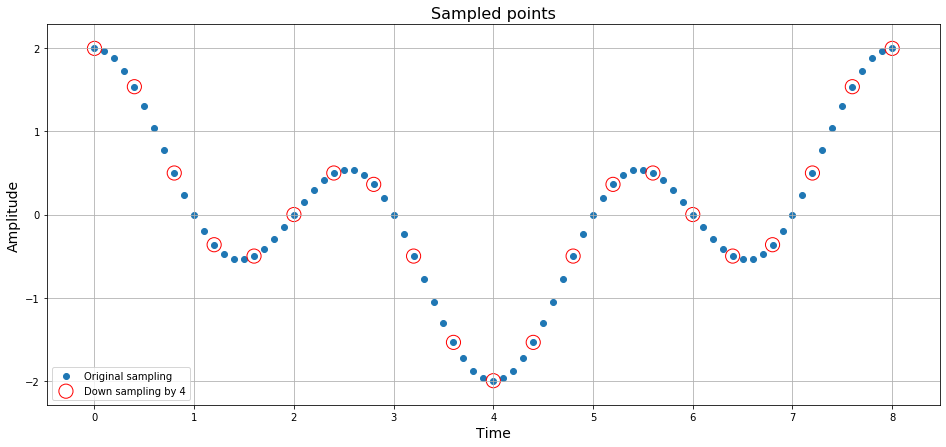

In [30]:
plt.figure(figsize=(16,7))

T = 8    # minimal amount of time to complete one full cycle
dt = 1/10

# original sampling points plot
n = np.arange((T/dt)+1)
plt.scatter(x=n*dt, y=xn(n*dt), label="Original sampling")


# down sampling
dt4 = 4*dt
n4 = np.arange((T/dt4)+1)
plt.scatter(x=n4*dt4, y=xn(n4*dt4), facecolors="none", edgecolor="r", s=200, label="Down sampling by 4")


# layout
plt.title("Sampled points", fontdict={"size": 16})
plt_layout(name="fig1")

# Upsampling by 6 and interpolate

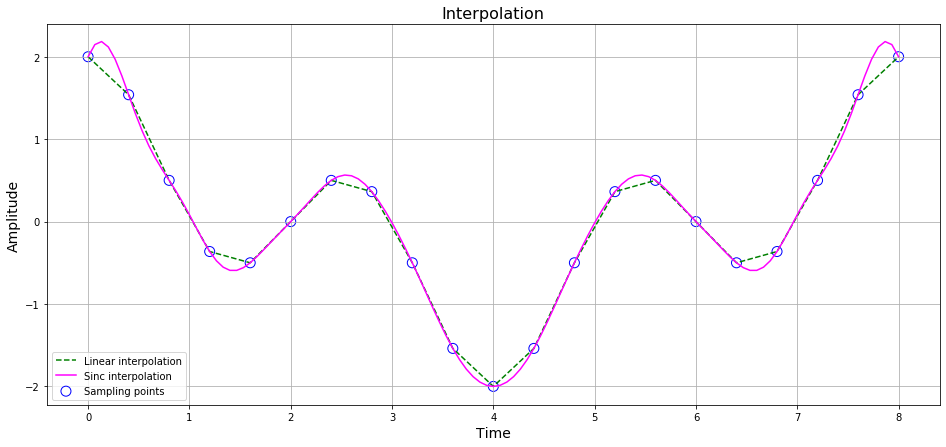

In [32]:
plt.figure(figsize=(16,7))

# plot sampling points
plt.scatter(x=n4*dt4, y=xn(n4*dt4), facecolors="none", edgecolor="b", s=100, label="Sampling points")

# upsampling
dt6 = dt4/6
n6 = np.arange((T/dt6)+1)

# linear interpolation
f_interp = interp1d(n4*dt4, xn(n4*dt4))
plt.plot(n6*dt6, f_interp(n6*dt6), label="Linear interpolation", c="g", linestyle="--")


# sinc interpolation
f_sinc = [sinc_interp(n, xn(n4*dt4), 6) for n in n6]
plt.plot(n6*dt6, f_sinc, label="Sinc interpolation", c="magenta", linestyle="-")

# layout
plt.title("Interpolation", fontdict={"size": 16})
plt_layout("fig2")